# Работа с PyMOL

In [1]:
import __main__
__main__.pymol_argv = [ 'pymol', '-x' ]

import pymol
pymol.finish_launching()

from pymol import cmd,stored

from IPython.display import Image, Video
import numpy as np

В этом практикуме мы будем осваивать PyMOL, и особенно управление им через jupyter.

## Sculpting

Sculpting - минимизатор энергии молекулы, работающий в реальном времени. Попробуем с его помощью изменить структуру  1LMP: комплекс лизоцима и олигосахарида.

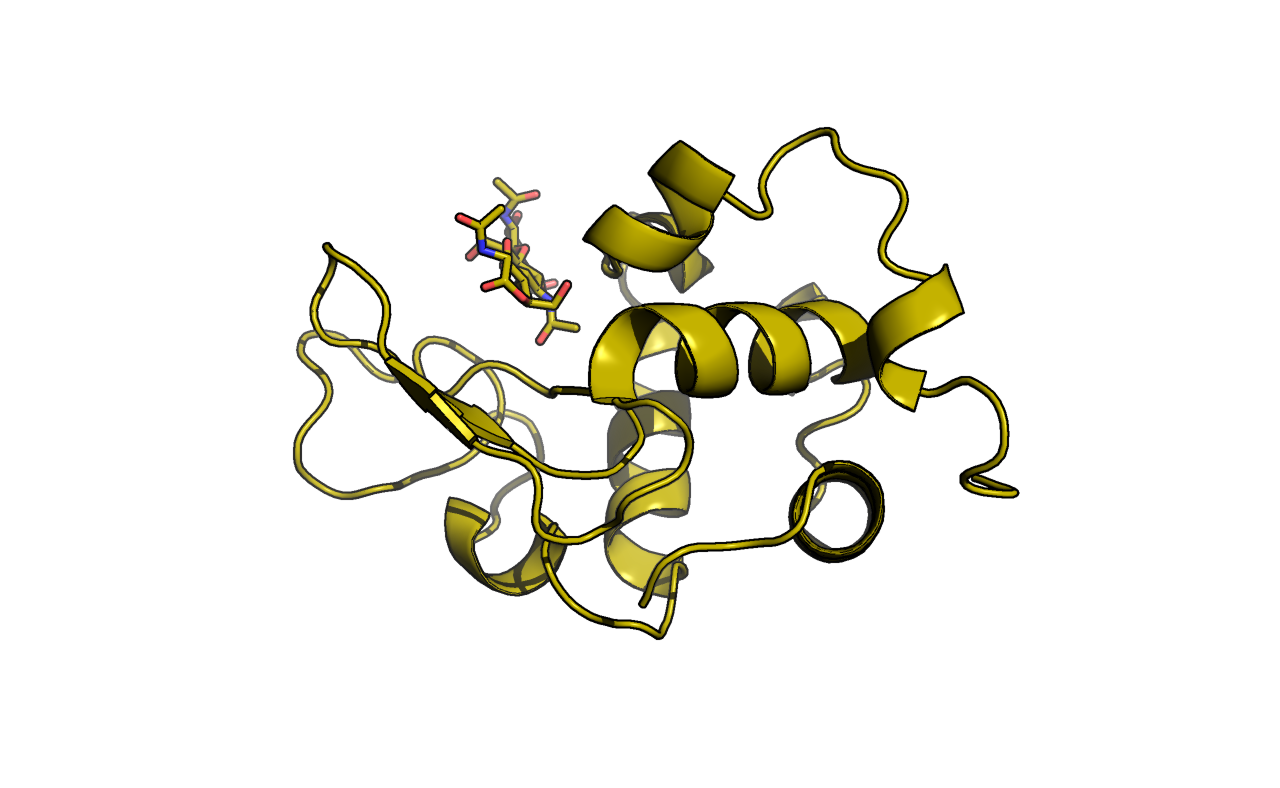

In [2]:
Image('1LMP.png', width=500)

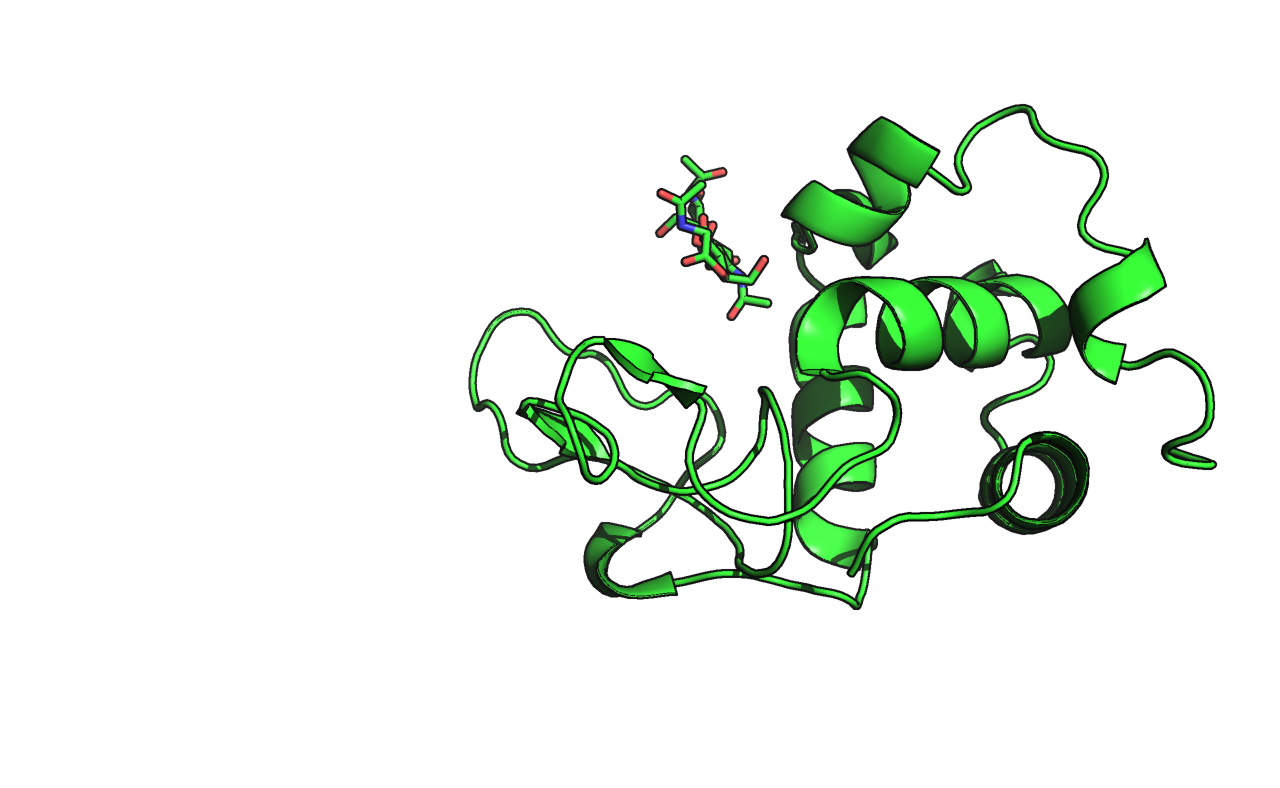

In [3]:
Image('1LMP_sculpting.png', width=500)

Мы немного изменили левую часть белка, участвующую в связывании с лигандом. При этом правда потеряло смыс отображение вторичной структуры в случае бета-листов...

## Создаём мутантную структуру

Теперь произведём в нашем исходном белке замену, которая должна нарушить его взаимодействие с лигандом. Предварительно мы предположили, что за связывание с лигандом отвечает в том числе образование водородной связи между Asp52 и одной из гидроксильных групп олигосахарида. Заменим остаток Asp52 на такой, который точно не сможет образовать водородную связь. Например, на изолейцин.

In [4]:
cmd.fetch('1LMP')

'1LMP'

In [5]:
cmd.remove('resn hoh')

In [6]:
cmd.wizard("mutagenesis")
cmd.get_wizard().set_mode("ILE")
cmd.get_wizard().do_select("1LMP///52/")
cmd.get_wizard().apply()

In [7]:
cmd.hide('lines')

1

In [8]:
cmd.save('1LMP_mut.pdb')

Теперь в файле 1LMP_mut.pdb хранится мутантная форма нашего белка.

## Создаём фильм

Создадим видео, в котором исходная и мутантная формы лизоцима наложатся, и продемонстрируем, каким образом наша мутация должна ухудшить связывание лиганда.

In [9]:
cmd.reinitialize()

In [10]:
cmd.do('''
fetch 1LMP
load 1LMP_mut.pdb, new
super new, 1LMP
color gray50, 1LMP
color gray80, new
show sticks, resi 52
color atomic, resi 52 and 1LMP
bg_color white
remove resn hoh
dist d, /1LMP/A/A/ASP`52/OD2, /1LMP/B/B/NDG`1/O1
hide label, d
set_view (\
     0.673386991,   -0.510006607,    0.535203516,\
    -0.248458549,    0.525711477,    0.813570082,\
    -0.696287572,   -0.680822551,    0.227290556,\
     0.000000000,    0.000000000, -125.822242737,\
    14.257795334,   51.116081238,   20.699855804,\
    99.199218750,  152.445266724,  -20.000000000 )

mset 1 x250


frame 1
translate [-100,0,0], object=new
mview store

frame 70
translate [0,0,0], object=new
set_view (\
     0.673386991,   -0.510006607,    0.535203516,\
    -0.248458549,    0.525711477,    0.813570082,\
    -0.696287572,   -0.680822551,    0.227290556,\
     0.000000000,    0.000000000,  -40.488872528,\
    22.007104874,   52.367809296,   26.195770264,\
    12.788737297,   68.189041138,  -20.000000000 )
mview store

frame 150
translate [+100,0,0], object=new
set_view (\
     0.673386991,   -0.510006607,    0.535203516,\
    -0.248458549,    0.525711477,    0.813570082,\
    -0.696287572,   -0.680822551,    0.227290556,\
     0.000000000,    0.000000000,  -40.488872528,\
    22.007104874,   52.367809296,   26.195770264,\
    12.788737297,   68.189041138,  -20.000000000 )
mview store

frame 200
translate [0,0,0], object=new
set_view (\
     0.673386991,   -0.510006607,    0.535203516,\
    -0.248458549,    0.525711477,    0.813570082,\
    -0.696287572,   -0.680822551,    0.227290556,\
     0.000000000,    0.000000000,  -40.488872528,\
    22.007104874,   52.367809296,   26.195770264,\
    12.788737297,   68.189041138,  -20.000000000 )
mview store


frame 250
translate [-100,0,0], object=new
mview store

''')

In [11]:
Video('movie.mp4', height=400)

## Флуоресцентная метка

Теперь с помощью сложноэфирной связи прикрепим к лизоциму флуоресцентную метку TAMRA.

In [12]:
cmd.reinitialize()
cmd.do('''
fetch 1LMP
fetch CID_2762604, lig
remove resn hoh

show sticks, /1LMP/A/A/SER`122/
remove /1LMP/A/A/SER`122/OG
remove /lig///UNK`0/H

fuse lig and id 2, /1LMP/A/A/SER`122/CB
delete lig

edit /1LMP/A/A/SER`122/CB, /1LMP/A/A/SER`122/CA
torsion 90
edit /1LMP///UNK`0/O02, /1LMP/A/A/SER`122/CB
torsion 90

unpick
set_view (\
    -0.546203732,    0.678273678,   -0.491536021,\
     0.837618530,    0.447580963,   -0.313154757,\
     0.007597619,   -0.582765758,   -0.812605739,\
     0.000000000,    0.000000000, -107.711631775,\
    12.801630020,   52.683292389,    5.561120987,\
  -459.466339111,  674.889587402,  -20.000000000 )
bg_color white
set ray_trace_mode,1
ray

png TAMRA.png
''')

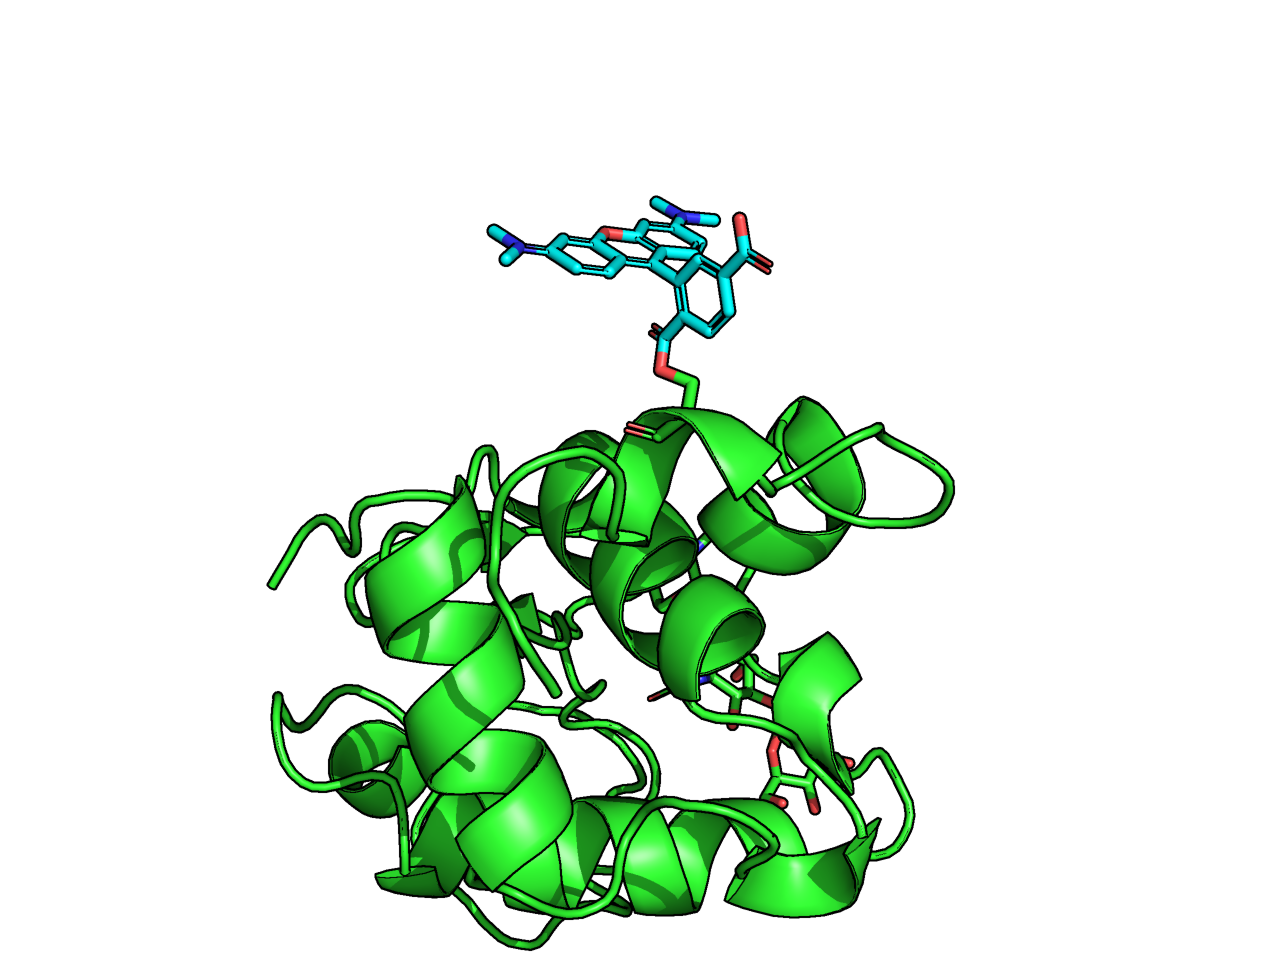

In [13]:
Image('TAMRA.png',width=700)

## Спираль

Поскольку как сделать спираль de novo я не успел разобраться, воспользуемся читерским способом.

In [14]:
cmd.reinitialize()
cmd.fab(name='PolyAla',input='A'*100,hydro=1,ss=1)
cmd.hide('everything')
cmd.show('sticks')
cmd.bg_color('white')
cmd.set('ray_trace_mode','1')
cmd.set_view('(\
    -0.802357376,   -0.374329537,   -0.464866489,\
    -0.403254807,    0.914207757,   -0.040140387,\
     0.440010071,    0.155253246,   -0.884471178,\
     0.000000000,    0.000000000, -339.154174805,\
    60.561523438,   28.181707382,  -46.247070312,\
  -227.907257080,  906.215454102,  -20.000000000 )')
cmd.ray()
cmd.png('polyAla_1.png')

1

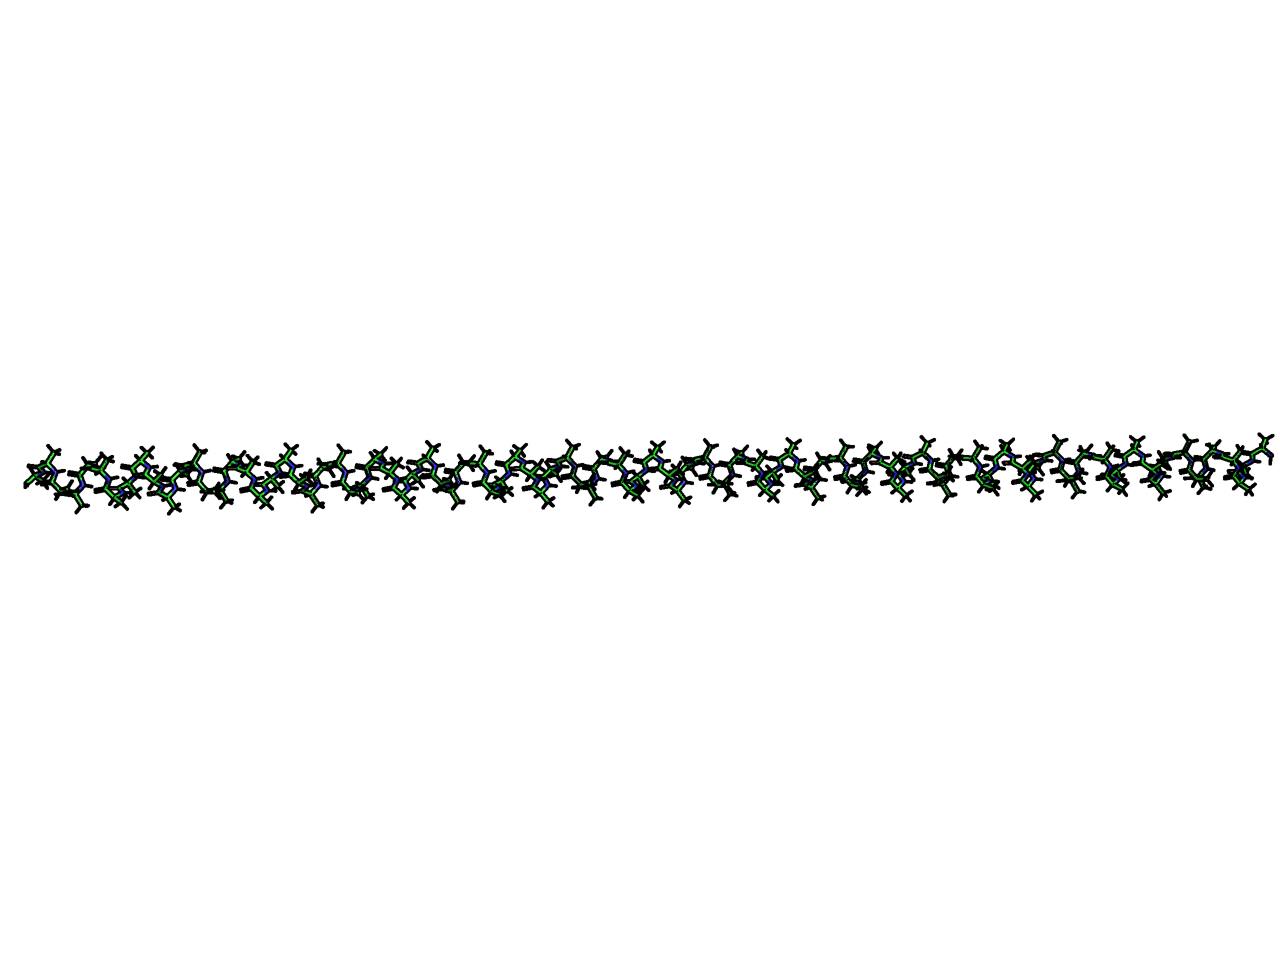

In [20]:
Image('polyAla_1.png')